<a href="https://colab.research.google.com/github/shatakshii25/Python-and-ML-Practice-Notebooks/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
s1 = ["congrats. you have won a lottery of 1 million and you can get the lottery amount by calling the lottery number.",
      "give your bank details to get your lottery amount in your bank account",
      "lottery for sure if your bank account details are verififed"]

In [2]:
s1

['congrats. you have won a lottery of 1 million and you can get the lottery amount by calling the lottery number.',
 'give your bank details to get your lottery amount in your bank account',
 'lottery for sure if your bank account details are verififed']

In [3]:
s1[0]

'congrats. you have won a lottery of 1 million and you can get the lottery amount by calling the lottery number.'

In [4]:
s1[1]

'give your bank details to get your lottery amount in your bank account'

In [5]:
s1[2]

'lottery for sure if your bank account details are verififed'

In [6]:
# tokenization - split a sentence into a group of words

In [7]:
s1[0].split() 

['congrats.',
 'you',
 'have',
 'won',
 'a',
 'lottery',
 'of',
 '1',
 'million',
 'and',
 'you',
 'can',
 'get',
 'the',
 'lottery',
 'amount',
 'by',
 'calling',
 'the',
 'lottery',
 'number.']

In [8]:
s1[1].split()

['give',
 'your',
 'bank',
 'details',
 'to',
 'get',
 'your',
 'lottery',
 'amount',
 'in',
 'your',
 'bank',
 'account']

In [9]:
s1[2].split()

['lottery',
 'for',
 'sure',
 'if',
 'your',
 'bank',
 'account',
 'details',
 'are',
 'verififed']

In [10]:
# count vectorization / Bag of Words technique
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english')
op = vect.fit_transform(s1).toarray()
op

array([[0, 0, 1, 1, 0, 3, 1, 1, 0, 0, 1],
       [1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0]])

In [11]:
import pandas as pd  #displaying data after applying count vectorizer/bow
df = pd.DataFrame(op,columns = vect.get_feature_names())
df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,account,bank,calling,congrats,details,lottery,million,number,sure,verififed,won
0,0,0,1,1,0,3,1,1,0,0,1
1,1,2,0,0,1,1,0,0,0,0,0
2,1,1,0,0,1,1,0,0,1,1,0


In [12]:
import pandas as pd

In [13]:
# SPAM HAM DATASET 
df = pd.read_table("https://raw.githubusercontent.com/arib168/data/main/spam.tsv")
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [14]:
df['message'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [15]:
df['label'][2]

'spam'

In [16]:
# is the dataset balanced or imbalanced?
# balanced - metric accuracy is sufficient 
# imbalanced - metrics (accuracy,recall,precision,f1-score)
df['label'].value_counts()

#dataset is imbalanced 

ham     4825
spam     747
Name: label, dtype: int64

In [17]:
# create a machine learning algorithm to predict if the entered message is spam or ham?

In [18]:
x = df['message'].values #choose the input 
y = df['label'].values   #choose the output 

In [19]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [20]:
# apply count vectorizer and then apply svm or naive bayes 

In [21]:
#step1 - apply count vectorizer for the input data 

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words = 'english')

x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

**USING SUPPORT VECTOR MACHINES**

In [22]:
# use the svc model classifier

from sklearn.svm import SVC 
model1 = SVC() 

In [23]:
model1.fit(x_train_vect,y_train)

SVC()

In [24]:
y_pred1 = model1.predict(x_test_vect)
y_pred1

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [25]:
y_test

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred1,y_test)

0.9813352476669059

In [27]:
data = ["let's go out this weekend"]
data = vect.transform(data) 

In [28]:
model1.predict(data)

array(['ham'], dtype=object)

In [29]:
# PIPELINE MODEL USING COUNT VECTORIZER AND SVC 
# pipeline - The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.
# Pipeline can be used to chain multiple estimators into one. 

# pipelines remove the problem of having to apply the transformation(count vecotrizer) everytime before predicting the output of the data

**USING SKLEARN PIPELINE FOR (COUNTVECTORIZER+SVC)**

In [30]:
from sklearn.pipeline import make_pipeline
model2 = make_pipeline(CountVectorizer(),SVC())

model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)
y_pred2

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred2,y_test)

0.9834888729361091

In [32]:
model2.predict(["let's go out this weekend"]) #without countvectorizer, pipeline model predicts the output 

array(['ham'], dtype=object)

**USING NAIVE BAYES CLASSIFIER**

In [33]:
from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB()

In [34]:
model3.fit(x_train_vect,y_train)

MultinomialNB()

In [35]:
y_pred3 = model3.predict(x_test_vect)
y_pred3 

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype='<U4')

In [36]:
y_test

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred3,y_test)

0.9863603732950467

In [38]:
# vectorization step before predicting is compulsory without a pipeline
data = ["win absolutely free tickets to the football game"]
data = vect.transform(data) 

In [39]:
model3.predict(data)

array(['spam'], dtype='<U4')

**USE SKLEARN PIPELINE FOR COUNTVECTORIZER()+MULTINOMIALNB()**

In [40]:
from sklearn.pipeline import make_pipeline 
model4 = make_pipeline(CountVectorizer(),MultinomialNB())

model4.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)
y_pred4

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype='<U4')

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred4,y_test)

0.9885139985642498

In [42]:
# model1 accuracy - 0.9813352476669059
# model2 accuracy - 0.9834888729361091
# model3 accuracy - 0.9863603732950467
# model4 accuracy - 0.9885139985642498 

In [43]:
#using the best model with highest accuracy to create a joblib file (joblib-similar to pickle)(model persistence)
# joblib is used for pipeline models

In [44]:
import joblib
joblib.dump(model4,'spam-ham')

['spam-ham']

In [45]:
# reload the model 

reloaded_model = joblib.load('spam-ham')
reloaded_model

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [46]:
#prediction using the reloaded model 

reloaded_model.predict(["Free entry to the mall"])

array(['spam'], dtype='<U4')

In [47]:
# WEBAPP CREATION USING STREAMLIT 
# download the spam-ham joblib file and keep it 

In [48]:
!pip install streamlit --quiet
#after installing , if it says restart runtime / if it gives an error for tornado.ioloop , then restart the runtime
# after restarting the runtime, run this cell once more (total 2 times)

     |████████████████████████████████| 9.1 MB 14.9 MB/s 
     |████████████████████████████████| 164 kB 61.9 MB/s 
     |████████████████████████████████| 181 kB 67.1 MB/s 
     |████████████████████████████████| 235 kB 66.3 MB/s 
     |████████████████████████████████| 78 kB 1.8 MB/s 
     |████████████████████████████████| 4.3 MB 21.6 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 132 kB 67.9 MB/s 
     |████████████████████████████████| 423 kB 19.5 MB/s 
     |████████████████████████████████| 793 kB 65.2 MB/s 
     |████████████████████████████████| 132 kB 64.1 MB/s 
     |████████████████████████████████| 381 kB 71.0 MB/s 
     |████████████████████████████████| 51 kB 6.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbclient 0.6.6 requires traitlets>=5.2.2, but you have traitlets 5.1.1 which 

In [49]:
%%writefile app.py 

#import the libraries
import streamlit as st 
import joblib 

#Add the title 
st.title("Spam Ham classification")

# load the joblib model 
reloaded_model = joblib.load('spam-ham')

# give the user input for doing the prediction
input1 = st.text_input("Enter the message :")

# use the joblib reloaded model to predict the output as spam or ham 
output1 = reloaded_model.predict([input1])


# if the PREDICT button is pressed, then give the output in the webapp 
if st.button("PREDICT"):   
  st.title([output1[0]])

Writing app.py


**THIS IMAGE IS JUST A DEMO REFERENCE**

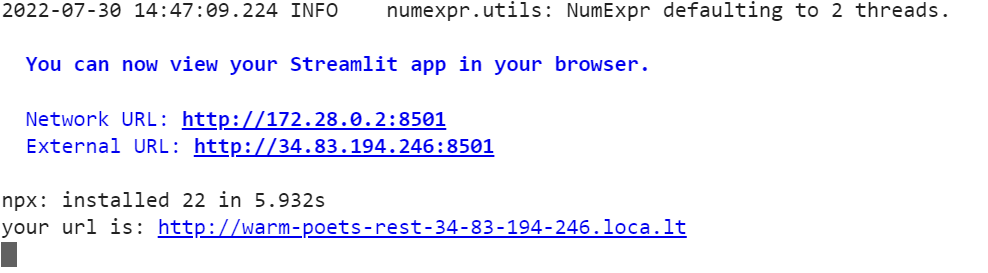

In [ ]:
#run the streamlit webapp 
!streamlit run app.py  & npx localtunnel --port 8501

2022-08-10 15:49:44.357 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.204.199.192:8501

npx: installed 22 in 3.986s
your url is: https://petite-hats-follow-35-204-199-192.loca.lt


In [ ]:
# your url is: http://rotten-beers-ring-34-83-194-246.loca.lt
# open this type of link 
# and then click on continue button

In [ ]:
# if there is any error in the app, come back to colab , stop this cell, 
# then edit the code and re run both the cells and then open the newly generated link

# refer to this code to change output from 0 and 1 to Positive and negative 

# op = ['Positive','Negative']
# st.title(op[y_pred[0]]) 